In [8]:
import pandas as pd
from textblob import TextBlob

In [37]:
bike_survey_london= pd.read_csv("assembly-bike-survey-data_london.csv")
bike_survey_london.head(5)

,RespondentID,Q1-Location,Q2-Age,Q3-Gender,Q4-BikeOwner,Q5-StartedCycling,Q6-WhenStarted,Q8-SuperhighwayUsed,Q9-SuperhighwayFrequency,Q10-Width,...,Q19-Frequency,Q20-Reason,Q20-ReasonOther,Q21-Duration,Q22-SupportCentre,Q23-Problem,Q24-SupportExperience,Q25-SupportComments,Q26-Improvements,Q27-Reason
0,1203127707,Kent,30-39,Male,Yes,"No, I already cycled",1 year,"Superhighway 7, Merton to the City via A24-A3",Only tried it once,fair,...,Once a fortnight,A combination of the above,"Tube, walking, bus and train.",Less than 30 mins,No,NaN,NaN,NaN,There should be the provision to be able to hi...,NaN
1,1202170092,Camden,40-49,Male,No,"Yes, because of the Cycle Hire Scheme",NaN,NaN,NaN,NaN,...,Several times a week,A combination of the above,NaN,Less than 30 mins,No,NaN,NaN,NaN,The docking point opposite the Black Cats fact...,NaN
2,1200588266,Richmond,18-29,Male,Yes,"No, I already cycled",Longer,NaN,NaN,NaN,...,Once a fortnight,A combination of the above,Instead of tube/walk/bus,Less than 30 mins,No,NaN,NaN,NaN,NaN,NaN
3,1200133603,NaN,40-49,Male,No,"Yes, because of the Cycle Hire Scheme",Longer,"Superhighway 7, Merton to the City via A24-A3",Once a week,good,...,Several times a week,A combination of the above,"Bus, tube, train and walking",Less than 30 mins,Yes,The wrong fob key was sent out. It did not co...,Very good,General comments: I love the scheme. Please ...,The bikes could have more reflectors on them. ...,NaN
4,1199557604,Sutton,30-39,Male,Yes,"No, I already cycled",Longer,"Superhighway 7, Merton to the City via A24-A3",Occasionally,very good,...,Several times a week,A combination of the above,"Instead of walking, bus or tube",Less than 30 mins,No,NaN,NaN,NaN,Just need many more stations to be left as spa...,NaN


### Sentimental analyst using text blob and polarity

In [12]:
# Drop rows with missing values in the text column
bike_survey_london= bike_survey_london.dropna(subset=['Q25-SupportComments'])

In [13]:
# Create a function to get the sentiment polarity using TextBlob
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Apply the function to your text column
bike_survey_london['Sentiment_Polarity'] = bike_survey_london['Q25-SupportComments'].apply(get_sentiment)


In [15]:
bike_survey_london['Sentiment_Category'] = pd.cut(bike_survey_london['Sentiment_Polarity'], bins=3, labels=['Negative', 'Neutral', 'Positive'])


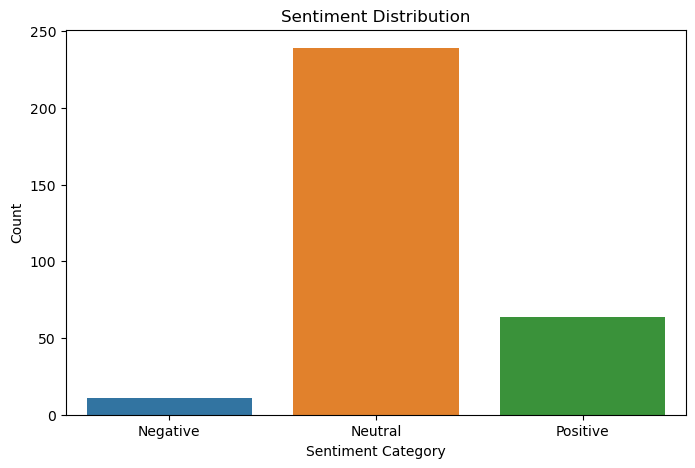

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment category
sentiment_counts = bike_survey_london['Sentiment_Category'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

### Sentiment analysis using VADER (Valence Aware Dictionary and Sentiment Reasoner)

In [19]:
#pip install vaderSentiment

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [21]:
bike_survey_london= pd.read_csv("assembly-bike-survey-data_london.csv")

In [26]:
# Drop rows with missing values in the text column
bike_survey_london= bike_survey_london.dropna(subset=['Q25-SupportComments'])
bike_survey_london["Q25-SupportComments"].head(10)

3     General comments:  I love the scheme.  Please ...
7     I was told that the incorrect fee would be tak...
12    Support has been good. The shame is that I hav...
13    Had to queue for literally over an hour. Assis...
30    very quick to talk to me, very quick to sort o...
36    Call centre was busy, they took my name and nu...
41    I needed 3 separate calls to resolve my regist...
57             I have never been able to get a response
60    Nice people but unable to solve any real problems
61    Quite a delay, then not answered by someone wi...
Name: Q25-SupportComments, dtype: object

In [33]:
# Create a function to get the compound sentiment score using VADER
def get_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    compound_score = analyzer.polarity_scores(str(text))['compound']
    return compound_score

# Apply the function to your text column
bike_survey_london['VADER_Sentiment_Score'] = bike_survey_london['Q25-SupportComments'].apply(get_vader_sentiment)
bike_survey_london.head()

,RespondentID,Q1-Location,Q2-Age,Q3-Gender,Q4-BikeOwner,Q5-StartedCycling,Q6-WhenStarted,Q8-SuperhighwayUsed,Q9-SuperhighwayFrequency,Q10-Width,...,Q20-ReasonOther,Q21-Duration,Q22-SupportCentre,Q23-Problem,Q24-SupportExperience,Q25-SupportComments,Q26-Improvements,Q27-Reason,VADER_Sentiment_Score,Sentiment_Category_VADER
3,1200133603,NaN,40-49,Male,No,"Yes, because of the Cycle Hire Scheme",Longer,"Superhighway 7, Merton to the City via A24-A3",Once a week,good,...,"Bus, tube, train and walking",Less than 30 mins,Yes,The wrong fob key was sent out. It did not co...,Very good,General comments: I love the scheme. Please ...,The bikes could have more reflectors on them. ...,NaN,0.8984,Positive
7,1198050062,Merton,40-49,Male,Yes,"No, I already cycled",Longer,"Superhighway 7, Merton to the City via A24-A3",Only tried it once,good,...,NaN,Less than 30 mins,Yes,Was incorrectly billed for several hours of bi...,Poor,I was told that the incorrect fee would be tak...,NaN,NaN,0.0000,Neutral
12,1197323125,Richmond upon Thames,40-49,Male,Yes,"No, I already cycled",Longer,NaN,NaN,NaN,...,"Tube, taxis, walking.",Less than 30 mins,Yes,Billing mostly. I'm one of the people affected...,Good,Support has been good. The shame is that I hav...,I want to be able to have more than one key on...,NaN,0.3612,Positive
13,1196772000,Camden,40-49,Male,Yes,"No, I already cycled",Longer,NaN,NaN,NaN,...,"bus, tube, walk, train. Combination!",Less than 30 mins,Yes,Bike wouldn't release at the station I was using.,Very poor,Had to queue for literally over an hour. Assis...,"Distribution, distribution, distribution! Also...",NaN,-0.5789,Negative
30,1195777047,tower hamlets,18-29,Male,Yes,"No, I already cycled",Longer,NaN,NaN,NaN,...,"instead of tube/bus, instead of walking, inste...",Less than 30 mins,Yes,"auto top up had not been activated once, the s...",Very good,"very quick to talk to me, very quick to sort o...",the cycle map on the barclays bikes website's ...,NaN,-0.1134,Neutral


In [28]:
# Create categories based on the VADER compound score
bike_survey_london['Sentiment_Category_VADER'] = pd.cut(bike_survey_london['VADER_Sentiment_Score'], bins=3, labels=['Negative', 'Neutral', 'Positive'])


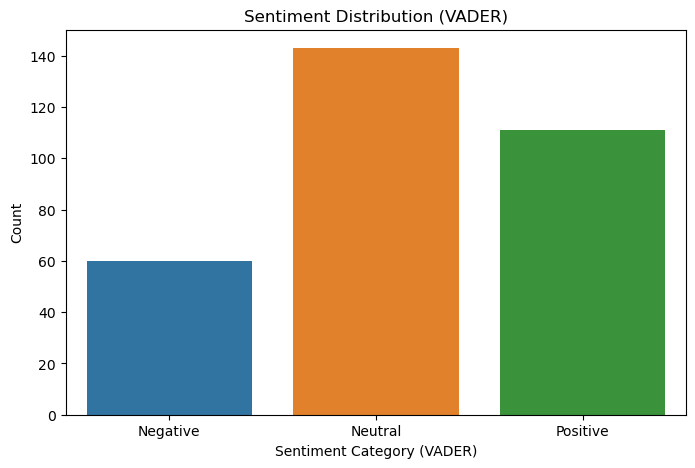

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment category
sentiment_counts_vader = bike_survey_london['Sentiment_Category_VADER'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts_vader.index, y=sentiment_counts_vader.values)
plt.title('Sentiment Distribution (VADER)')
plt.xlabel('Sentiment Category (VADER)')
plt.ylabel('Count')
plt.show()


## Sentiment analysis using TfidfVectorizer

In [49]:
Public_transpor_ireland= pd.read_csv("Public transport Ireland (respuestas) - Respuestas de formulario 1.csv")
Public_transpor_ireland.head(5)


,Marca temporal,Age,Gender,Profession,Public transport commonly used,Principal reason to use public transport,Perception of public transport in Ireland
0,30/12/2023 04:33,32,Female,Student,Luas,Study,"I love luas is very reliable, in general I thi..."
1,30/12/2023 04:35,32,Female,NaN,"Bus, Luas, Public Bikes","Work, Study, Visit family / friends/entertainm...",love public transport
2,30/12/2023 04:36,32,Female,Student,"Bus, Luas, Public Bikes","Work, Study, Visit family / friends/entertainm...","I love luas is very reliable, in general I thi..."
3,30/12/2023 04:52,19,Female,Student,Bus,Work,Bad.
4,30/12/2023 04:57,25,Male,Data Analyst,"Bus, Luas","Work, Visit family / friends/entertainment/lei...",It has room for improvement. With the new Go A...


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming df is your DataFrame
text_data = Public_transpor_ireland['Perception of public transport in Ireland'].astype(str)  # Convert to string to handle NaN values

# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer(stop_words='english')  # You can customize stop words based on your requirements

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(text_data)

# Create a DataFrame with the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the new DataFrame with the original DataFrame
Public_transpor_ireland = pd.concat([Public_transpor_ireland, tfidf_df], axis=1)

# Display the resulting DataFrame
Public_transpor_ireland.head()


,Marca temporal,Age,Gender,Profession,Public transport commonly used,Principal reason to use public transport,Perception of public transport in Ireland,accurate,ahead,announced,...,uncovered,unpunctual,use,ve,wave,weekends,wish,work,worst,years
0,30/12/2023 04:33,32,Female,Student,Luas,Study,"I love luas is very reliable, in general I thi...",0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,30/12/2023 04:35,32,Female,NaN,"Bus, Luas, Public Bikes","Work, Study, Visit family / friends/entertainm...",love public transport,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,30/12/2023 04:36,32,Female,Student,"Bus, Luas, Public Bikes","Work, Study, Visit family / friends/entertainm...","I love luas is very reliable, in general I thi...",0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,30/12/2023 04:52,19,Female,Student,Bus,Work,Bad.,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,30/12/2023 04:57,25,Male,Data Analyst,"Bus, Luas","Work, Visit family / friends/entertainment/lei...",It has room for improvement. With the new Go A...,0.218125,0.218125,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.218125,0.0,0.0,0.0
